In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update({'font.size': 14,
                     'xtick.labelsize': 14})
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('seaborn-ticks')

In [3]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

In [4]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],   # для умножения на intercept
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]]).T # стаж
# средний балл ЕГЭ (целевая переменная)
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]
# Метод наименьших квадратов
w = np.linalg.inv(X.T @ X) @ X.T @ y
print(w, calc_mse(y, w @ X.T))

[47.23214286  3.91071429] 45.937499999999986


### Домашние задания

1. Подберите скорость обучения (alpha) и количество итераций:

In [5]:
n = X.shape[0]
alpha = 1e-1
w = np.array([1, 0.5])

for i in range(1001):
    y_pred = np.dot(w, X.T)
    err = calc_mse(y, y_pred)
    for j in range(w.shape[0]):
        w[j] -= alpha * (1/n * 2 * np.sum(X[:,j] * (y_pred - y)))
    if i % 100 == 0:
        print(i, w, err) # [47.23214286  3.91071429] 45.937499999999986

0 [12.02 34.5 ] 3173.15
100 [1.21092169e+31 6.55765787e+31] 1.6499598531554106e+64
200 [3.40912000e+61 1.84618401e+62] 1.3077533388173627e+125
300 [9.59772979e+91 5.19758039e+92] 1.0365214595478304e+186
400 [2.70205851e+122 1.46328003e+123] 8.215438678021257e+246
500 [7.60713247e+152 4.11958697e+153] inf


C:\Users\User\Anaconda3\envs\py37_64\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  
C:\Users\User\Anaconda3\envs\py37_64\lib\site-packages\numpy\core\_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


600 [2.14164365e+183 1.15979146e+184] inf
700 [6.02939088e+213 3.26517254e+214] inf
800 [1.69746047e+244 9.19247307e+244] inf
900 [4.77887752e+274 2.58796618e+275] inf
1000 [1.34540219e+305 7.28592718e+305] inf


In [6]:
np.logspace(-4, -2, 5)

array([0.0001    , 0.00031623, 0.001     , 0.00316228, 0.01      ])

In [7]:
w = np.array([1, 0.5])
alpha_list = []
mse_list = []
it = range(2001)
 
for alpha in np.logspace(-4, -2, 5):
    alpha_list.append(alpha)
    errs = []
    for t in it:
        y_pred = np.dot(w, X.T)
        err = calc_mse(y, y_pred)
        for j in range(w.shape[0]):
            w[j] -= alpha * (1/n * 2 * np.sum(X[:,j] * (y_pred - y)))
        errs.append(err)
    mse_list.append(errs)

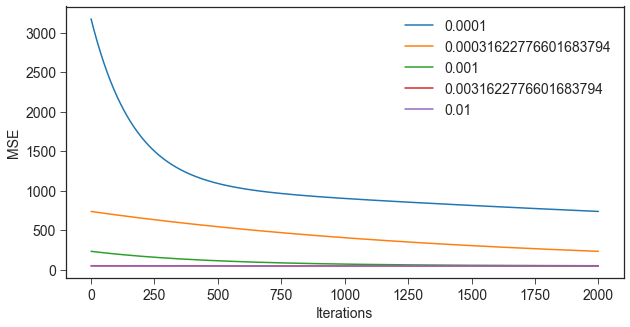

In [8]:
for i in range(len(alpha_list)):
    plt.plot(it, mse_list[i], label=alpha_list[i])
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.legend();

Выводы:

1. При постоянной скорости обучения с увеличением числа итераций ошибка уменьшается, пока не достигнет своего минимума.

2. Чем выше скорость обучения, тем меньше требуется итераций, чтобы алгоритм нашел оптимальные веса.

3. Но при достаточно большой alpha алгоритм выходит из минимума функции потерь и ошибка начинает расти (если алгоритм не остановить).

*2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [9]:
X.T * (y_pred - y)

array([[  6.14285714,  -3.85714286,   5.05357143,  -7.85714286,
         -6.03571429,  12.23214286,  -8.21428571,   6.33928571,
          1.14285714,  -4.94642857],
       [  6.14285714,  -3.85714286,  10.10714286,  -7.85714286,
        -18.10714286,   0.        , -41.07142857,  63.39285714,
          1.14285714,  -9.89285714]])

In [10]:
y_pred = np.dot(w, X.T)
np.sum(X.T * (y_pred - y), axis=1)

array([-1.37561074e-11,  2.52242671e-12])

In [11]:
n = X.shape[0]
alpha = 1e-2
w = np.array([1, 0.5])

for i in range(10001):
    y_pred = np.dot(w, X.T)
    err = calc_mse(y, y_pred)
    '''for j in range(W.shape[0]):
        W[j] -= alpha * (1/n * 2 * np.sum(X[j] * (y_pred - y)))'''
    #w -= alpha * (1/n * 2 * np.dot(X.T, (y_pred - y)))
    w -= alpha * (1/n * 2 * np.sum(X.T * (y_pred - y), axis=1))
    if i % 1000 == 0:
        print(i, w, err) # [47.23214286  3.91071429] 45.937499999999986

0 [2.102 3.9  ] 3173.15
1000 [47.23088237  3.91094704] 45.937500872219864
2000 [47.23214282  3.91071429] 45.93750000000001
3000 [47.23214286  3.91071429] 45.937499999999986
4000 [47.23214286  3.91071429] 45.9375
5000 [47.23214286  3.91071429] 45.9375
6000 [47.23214286  3.91071429] 45.9375
7000 [47.23214286  3.91071429] 45.9375
8000 [47.23214286  3.91071429] 45.9375
9000 [47.23214286  3.91071429] 45.9375
10000 [47.23214286  3.91071429] 45.9375


*3. Вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию начинает изменяться ниже определенного порога.

Сколько нужно сделать итераций, если установить допустимое отклонение MSE в размере 
$\text{diff}=10^{−6}$, а значение $\alpha=10^{−2}$?

In [12]:
w = np.array([1., 0.5])
diff = 1e-6  # допустимое отклонение, погрешность, tolerance
alpha = 1e-2
err_pred = np.inf # предыдущая ошибка
i = 0 # номер итерации

while True:
    y_pred = np.dot(w, X.T)
    err = calc_mse(y, y_pred)
    w -= (alpha * (1/n * 2 * np.dot(X.T, (y_pred - y))))
    i += 1
    if np.abs(err - err_pred) <= diff:
        print('Stop:', i, w, err)
        break
    else:
        err_pred = err # [47.23214286  3.91071429] 45.937499999999986

Stop: 810 [47.22286276  3.91242793] 45.937547277798465


In [13]:
n = X.shape[0]
alpha = 1e-2
w = np.array([1., 0.5])
delta = 1e-6
err_old = np.inf
i = 0

while True:
    y_pred = np.dot(w, X.T) 
    err_new = calc_mse(y, y_pred)
    w -= alpha * (1/n * 2 * np.sum(X.T * (y_pred - y), axis=1))
    i += 1
    if (err_old - err_new) <= delta:
        print(i, w, err_new)
        break
    err_old = err_new

810 [47.22286276  3.91242793] 45.937547277798465


In [14]:
n = X.shape[0]
alpha = 6e-2
w = np.array([1, 0.5])
tolerance = 1e-10
err_diff = 1e10
err_old = 1e10
i = 0

while err_diff > tolerance:
    y_pred = np.dot(w, X.T) 
    err_new = calc_mse(y, y_pred)
    w -= alpha * (1/n * 2 * np.sum(X.T * (y_pred - y), axis=1))
    i += 1
    err_diff = err_old - err_new
    err_old = err_new
print(i, w, err_new) # [47.23214286  3.91071429] 45.937499999999986

219 [47.23210993  3.91072037] 45.93750000066322


## Код из методички

In [15]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y):
    y_pred = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [16]:
def normal_equation(X, y):
    return np.linalg.solve((X.T).dot(X), (X.T).dot(y))

X = X.copy()
normal_eq_w = normal_equation(X, y)
print(normal_eq_w)
print(f'В случае использования нормального уравнения функционал ошибки составляет {round(mserror(X, normal_eq_w, y), 4)}')

[47.23214286  3.91071429]
В случае использования нормального уравнения функционал ошибки составляет 45.9375


In [17]:
# список векторов весов после каждой итерации
w = np.zeros(X.shape[1])
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors = []

# шаг градиентного спуска
eta = 0.01

# максимальное число итераций
max_iter = 1e4

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-6

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    new_w = w - 2 * eta * np.dot(X.T, (np.dot(X, w) - y)) / len(y)
    weight_dist = np.linalg.norm(new_w - w, ord=2)  # 2-норма вектора 
    # евклидова норма, обычно используемая для вычисления длины вектора
    # здесь - расстояние между векторами
    
    w_list.append(new_w.copy())
    errors.append(mserror(X, new_w, y))
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

print(w_list)

[[ 0.          0.        ]
 [ 1.148       3.598     ]
 [ 2.085944    6.085688  ]
 ...
 [47.23204762  3.91073187]
 [47.23204861  3.91073169]
 [47.23204959  3.91073151]]


In [18]:
w_true = np.array([47.23214285714286, 3.910714285714285])

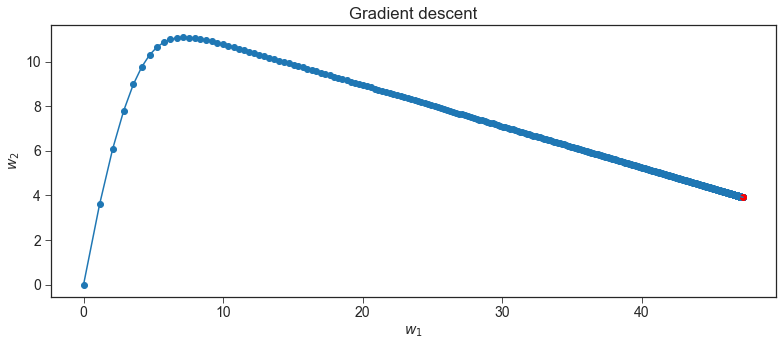

In [19]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 5))
plt.title('Gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(w_true[0], w_true[1], c='r')
plt.plot(w_list[:, 0], w_list[:, 1]);

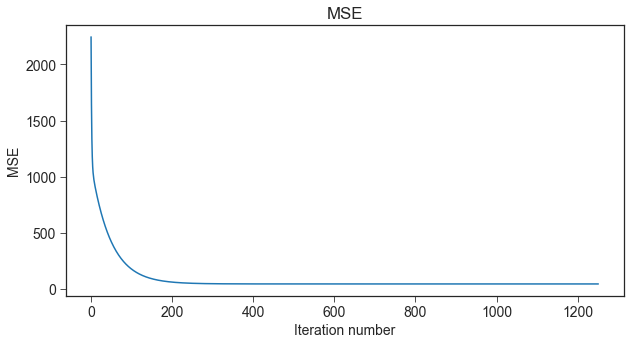

In [20]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE');